# Agriculture Artificial Neural Network

## Imports

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Import Data from excel

In [ ]:
file_path = 'balanced_data_2.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.head()

,Unnamed: 0,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,rain_intensity,nitrogen_expectation,nitrogen_added,phosphorus_expectation,phophorus_added,potassium_expectation,potassium_added,water_expectation
0,0,4,6,8,3,3,2,12,8,5,0,6,0,3
1,1,9,9,2,0,3,0,12,3,4,0,6,4,1
2,2,7,6,13,0,0,1,9,2,3,0,5,0,1
3,3,13,6,11,1,1,1,9,0,3,0,5,0,1
4,4,10,7,4,5,0,3,14,4,6,0,8,4,3


## Splitting the Data

In [ ]:
features = df.columns[1:7]
X = torch.tensor(df[features].values, dtype=torch.float32)
y = torch.tensor(df[df.columns[7:]].values, dtype=torch.float32)

In [ ]:
X

tensor([[ 4.,  6.,  8.,  3.,  3.,  2.],
        [ 9.,  9.,  2.,  0.,  3.,  0.],
        [ 7.,  6., 13.,  0.,  0.,  1.],
        ...,
        [ 8.,  4.,  0.,  0.,  1.,  1.],
        [ 6., 13., 10.,  3.,  2.,  2.],
        [ 7.,  7.,  5.,  4.,  1.,  3.]])

In [ ]:
y.shape

torch.Size([3450, 7])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating the Neural Network

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(len(features), 32)
        self.layer2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 7)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return self.output(x)

## Compile Network

In [ ]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (layer1): Linear(in_features=6, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=7, bias=True)
)


# Loading the Data

In [ ]:
# Create a TensorDataset
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)

# Create a DataLoader with the specified batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20, shuffle=True)

## Loss and optimizer


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Training loop


In [ ]:
epochs = 100
losses = []
avg_losses = []
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:  # Iterate over batches
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f'Epoch {epoch+1}, Average Loss: {sum(losses) / len(losses)}')
    avg_losses.append(sum(losses) / len(losses))

Epoch 1, Average Loss: 3.2976239600043367
Epoch 2, Average Loss: 1.9984457655877308
Epoch 3, Average Loss: 1.485130188041839
Epoch 4, Average Loss: 1.2087415948078253
Epoch 5, Average Loss: 1.0411158699272336
Epoch 6, Average Loss: 0.9287012822134195
Epoch 7, Average Loss: 0.846340140231401
Epoch 8, Average Loss: 0.7818893792809568
Epoch 9, Average Loss: 0.7331978475701981
Epoch 10, Average Loss: 0.6924776628181555
Epoch 11, Average Loss: 0.6595064575669793
Epoch 12, Average Loss: 0.6296607652535113
Epoch 13, Average Loss: 0.6067642731552605
Epoch 14, Average Loss: 0.5853552461310635
Epoch 15, Average Loss: 0.5658366953585171
Epoch 16, Average Loss: 0.5481155580010914
Epoch 17, Average Loss: 0.5321186805066144
Epoch 18, Average Loss: 0.5183496139073765
Epoch 19, Average Loss: 0.504046128527137
Epoch 20, Average Loss: 0.49082964751329544
Epoch 21, Average Loss: 0.4791503076957702
Epoch 22, Average Loss: 0.46801155158692825
Epoch 23, Average Loss: 0.4565452294261033
Epoch 24, Average Los


## Plotting the loss over epochs

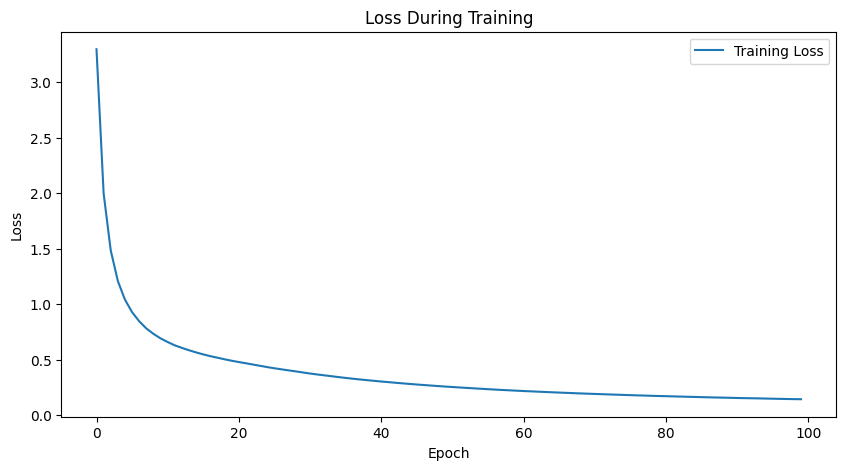

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(avg_losses, label='Training Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.eval()

# Forward pass to obtain predictions
with torch.no_grad():
    predictions = model(X_test)

In [ ]:
predictions

tensor([[ 1.2968e+01,  8.8437e+00,  5.1951e+00,  ...,  6.9675e+00,
         -4.6917e-02,  1.9871e+00],
        [ 1.2079e+01,  1.2043e+01,  4.0704e+00,  ...,  6.0848e+00,
         -5.2910e-03,  2.0186e+00],
        [ 9.0667e+00,  5.9583e+00,  2.9683e+00,  ...,  4.9809e+00,
          5.1154e+00,  1.0458e+00],
        ...,
        [ 1.4157e+01,  8.0103e+00,  6.0639e+00,  ...,  7.1300e+00,
          3.7704e+00,  3.8926e+00],
        [ 9.0882e+00,  2.4005e-02,  2.9731e+00,  ...,  4.9872e+00,
         -1.3814e-03,  9.9359e-01],
        [ 1.2111e+01,  1.0996e+01,  4.0618e+00,  ...,  6.1054e+00,
          5.6419e-02,  1.7316e+00]])

In [ ]:
y_test

tensor([[13.,  9.,  5.,  ...,  7.,  0.,  2.],
        [12., 12.,  4.,  ...,  6.,  0.,  2.],
        [ 9.,  6.,  3.,  ...,  5.,  5.,  1.],
        ...,
        [14.,  8.,  6.,  ...,  7.,  4.,  4.],
        [ 9.,  0.,  3.,  ...,  5.,  0.,  1.],
        [12., 11.,  4.,  ...,  6.,  0.,  2.]])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)


In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.0862661
Mean Squared Error (MSE): 0.0157374
Root Mean Squared Error (RMSE): 0.1254488
R-squared (R2) Score: 0.9934692577574086


# Saving the Model

In [ ]:
# Save the model
torch.save(model.state_dict(), 'model_d2.pth')

# ONNX Export

In [ ]:
!pip install -q onnx onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
import torch.onnx

# Input to the model
dummy_input = torch.randn(1, 6)

# Export the model
torch.onnx.export(model, dummy_input, 'model_d2_b1.onnx', input_names = ['input'], output_names = ['output'])


# ONNX Inference

In [ ]:
import onnx
onnx_model = onnx.load("model_d2_b1.onnx")
onnx.checker.check_model(onnx_model)

In [ ]:
import onnxruntime as ort

# Load the ONNX model
onnx_model_path = 'model_d2_b1.onnx'
ort_session = ort.InferenceSession(onnx_model_path)

test_data = [[
    [7, 5, 4, 2, 5, 1],
    [1, 5, 6, 3]
]]

# Extract input data
x, y = np.array(test_data[0][0], dtype=np.float32), np.array(test_data[0][1], dtype=np.float32)
x = np.expand_dims(x, axis=0)  # Add batch dimension

# x, y = test_data[0][0], test_data[0][1]
ort_sess = ort.InferenceSession('model_d2_b1.onnx')
outputs = ort_sess.run(None, {'input': x})


# # Print Result
# predicted, actual = classes[outputs[0][0].argmax(0)], classes[y]
# print(f'Predicted: "{predicted}", Actual: "{actual}"')

In [ ]:
outputs

[array([[11.297584  ,  4.322093  ,  3.9987867 , -0.12075841,  5.818963  ,
          1.8725854 ,  2.5138252 ]], dtype=float32)]

# NN Visualization

In [ ]:
!pip install -q torchviz

  Preparing metadata (setup.py) ... done


In [ ]:
from torchviz import make_dot

model = NeuralNetwork()
X = torch.tensor([7, 5, 4, 2, 5, 1], dtype=torch.float32)
y = model(X)

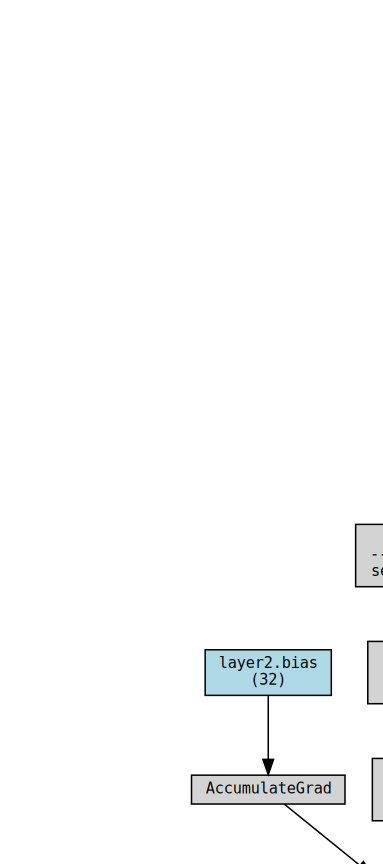

In [ ]:
make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)


In [57]:
# Using tensorboard
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("torchlogs/")
model = NeuralNetwork()
writer.add_graph(model, X)
writer.close()

# cd <path-to-logs-dir>
# tensorboard --logdir=./